In [175]:
# PROJECT TITLE - PREDICT FARE OF AIRLINES TICKETS USING MACHINE LEARNING
# DATA COLLECTION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
!pip install openpyxl      #pandas uses openpyxl to read .xlsx files


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#pandas': Expected package name at the start of dependency specifier
    #pandas
    ^


In [177]:
train_data = pd.read_excel(r"C:\\Users\\bhumi\\OneDrive\\Documents\\Flight_Price_resources\\Data_Train.xlsx")
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [178]:
train_data.head(4)   #first 4 rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [179]:
train_data.tail(4)   #last 4 rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [180]:
#DATA CLEANING
train_data.info()  #shows column names,data types, non-null counts and shows actual memory used by each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [181]:
train_data.isnull().sum()    #2 features have missing values - route and total_stops

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [182]:
train_data['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [183]:
train_data[train_data['Total_Stops'].isnull()]    #shows all the rows where the Total_Stops value is missing/empty.

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [184]:
train_data.dropna(inplace = True)     #remove missing values (NaN) and inplace = True means to update this in my training data as well.

In [185]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [186]:
train_data.dtypes    # in pandas we have object which is similar to string

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [187]:
train_data.info(memory_usage ="deep")     #Show detailed info about my dataset, including exact memory usage

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


In [188]:
#PERFORM DATA PRE-PROCESSING & EXTRACT THE DERIVED FUNCTION
data = train_data.copy()    #Creates a separate copy of train_data, Make a duplicate of the dataset so I can work freely on it

In [189]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [190]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [191]:
data.dtypes   #date_of_journey, dep_time, arrival_time must have a time stamp nature datatype

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [192]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [193]:
import warnings                    #Don’t show warning messages while running the code
from warnings import filterwarnings
filterwarnings("ignore")

In [194]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [195]:
for feature in['Dep_Time', 'Arrival_Time', 'Date_of_Journey']:
    change_into_Datetime(feature)

In [196]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [197]:
data["Journey_day"] = data['Date_of_Journey'].dt.day  #Get the day value from each date, Selects the Date_of_Journey column.dt → tells pandas this is date/time data .day → extracts the day number from the date

In [198]:
data["Journey_month"] = data['Date_of_Journey'].dt.month

In [199]:
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [200]:
data.head(3)   # new features inserted into this

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2026-02-04 22:20:00,2026-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2026-02-04 05:50:00,2026-02-04 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2026-02-04 09:25:00,2026-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


In [201]:
#Perform data cleaning and extract derived attributes
def extract_hour_min(df, col):
    df[col + "_hour"] = df[col].dt.hour
    df[col + "_minute"] = df[col].dt.minute
    return df.head(3)

In [202]:
extract_hour_min(data, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2026-02-04 22:20:00,2026-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2026-02-04 05:50:00,2026-02-04 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2026-02-04 09:25:00,2026-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [203]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute'],
      dtype='object')

In [204]:
extract_hour_min(data, "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2026-02-04 22:20:00,2026-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2026-02-04 05:50:00,2026-02-04 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2026-02-04 09:25:00,2026-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [205]:
cols_to_drop = ['Arrival_Time' , 'Dep_Time']
data.drop(cols_to_drop, axis= 1, inplace = True)    #axis = 1 means drop the columns in vertical way and inplace = 1 means it will update the data frame as well.

In [206]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [207]:
data.shape #rows and columns

(10682, 16)

In [208]:
#PERFORMING DATA ANALYSIS - Analyse when will most of the flights take-off
def flight_dep_time(x):
    if(x > 4) and (x <= 8):
        return "Early Morning"
    elif (x > 8) and (x <= 12):
        return "Morning"
    elif (x > 12) and (x <=16):
        return "Noon"
    elif (x > 16) and (x <= 20):
        return "Evening"
    elif (x > 20) and (x <= 24):
        return "Night"
    else:
        return "late night"

In [209]:
data['Dep_Time_hour'].apply(flight_dep_time)

0                Night
1        Early Morning
2              Morning
3              Evening
4                 Noon
             ...      
10678          Evening
10679          Evening
10680    Early Morning
10681          Morning
10682          Morning
Name: Dep_Time_hour, Length: 10682, dtype: object

In [210]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts()

Dep_Time_hour
Early Morning    2880
Evening          2357
Morning          2209
Noon             1731
Night            1040
late night        465
Name: count, dtype: int64

<Axes: xlabel='Dep_Time_hour'>

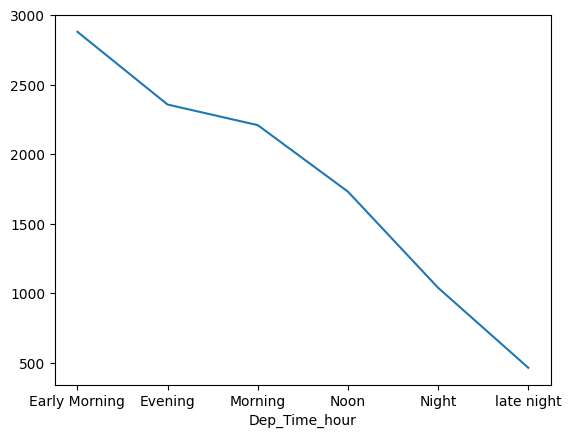

In [211]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot()    #by default it will return a plot

<Axes: xlabel='Dep_Time_hour'>

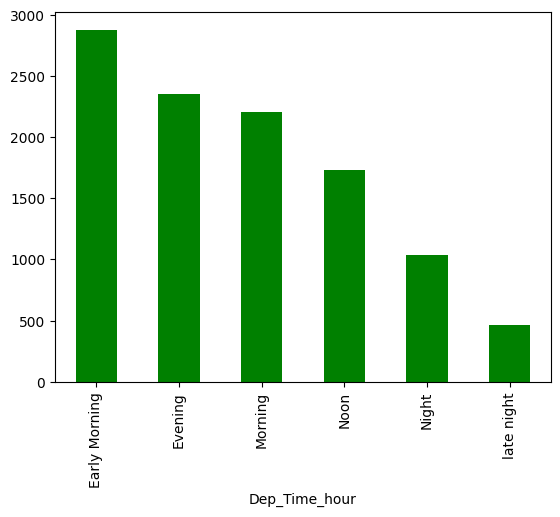

In [212]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind = "bar", color="g")

In [213]:
!pip install plotly        
#dynamic and interactive graphs and visualizations
!pip install chart_studio  
#upload/share Plotly charts online
!pip install cufflinks     
#connects pandas DataFrames with Plotly


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [214]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline     #allows plots to work without internet
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected = True)         #enables Plotly in Jupyter Notebook
cf.go_offline()
#Set up Plotly + Cufflinks for offline interactive plotting in Jupyter

In [215]:
import plotly.express as px
#Used for quick, interactive charts
counts = data['Dep_Time_hour'].apply(flight_dep_time).value_counts()
fig = px.bar(x=counts.index, y=counts.values)
fig.show()

In [216]:
#PERFORM DATA PRE-PROCESSING ON DURATION FEATURE
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'

    return x

In [217]:
data['Duration'].apply(preprocess_duration)

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [218]:
data['Duration'][0]

'2h 50m'

In [219]:
'2h 50m'.split(' ')

['2h', '50m']

In [220]:
'2h 50m'.split(' ')[0]

'2h'

In [221]:
'2h 50m'.split(' ')[0][0:-1]

'2'

In [222]:
type('2h 50m'.split(' ')[0][0:-1])

str

In [223]:
int('2h 50m'.split(' ')[0][0:-1])     #hour value

2

In [224]:
int('2h 50m'.split(' ')[1][0:-1])     #minute value

50

In [225]:
data['Duration_hours'] = data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [226]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [227]:
data['Duration_mins'] = data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))


In [228]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

In [229]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [230]:
#LET ANALYSE WHETHER DURATION IMPACTS PRICE OR NOT
data["Duration_total_mins"] = data['Duration'].str.replace('h',"*60").str.replace(' ', '+').str.replace('m',"*1").apply(eval)

In [231]:
data["Duration_total_mins"]

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

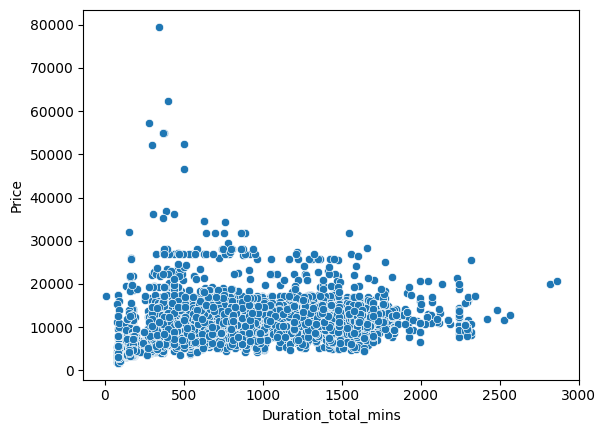

In [232]:
#scatter plot tells the relationship between both the continuous feature (relationship and best fit line)
sns.scatterplot(x = "Duration_total_mins" , y = "Price", data = data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

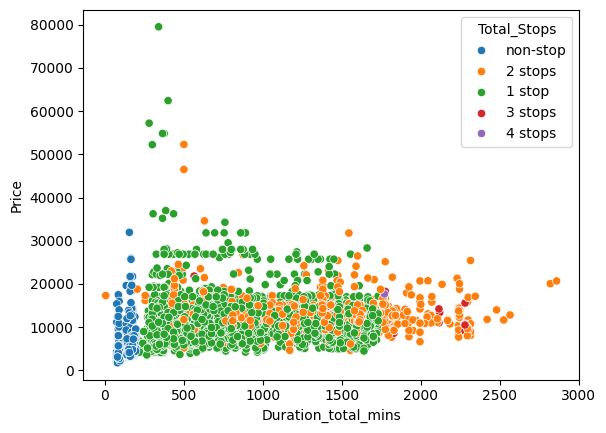

In [233]:
sns.scatterplot(x = "Duration_total_mins" , y = "Price",hue = "Total_Stops", data = data) #hue means each category of Total_Stops gets a different color i.e. colors the points based on the values in Total_Stops

The interpretation - Blue data states that non-stop flights takes less duration and fare is also low. As the number of stops increases, duration also increases and price will also increase in some of the cases.

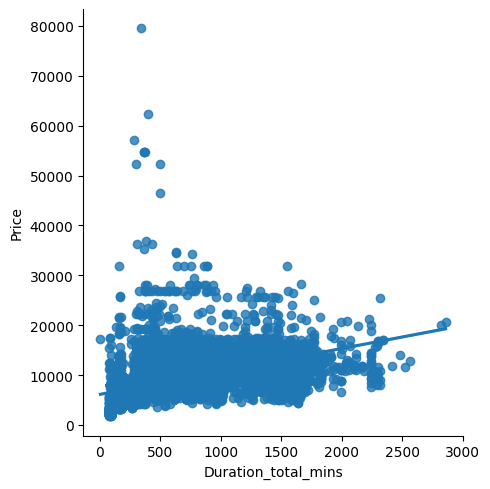

In [234]:
#Regression plot
sns.lmplot(x = "Duration_total_mins" , y = "Price", data = data)

The Regression line states that as the duration increases the price also increases for most of the case. If the slope value is approx 0.6 it means that if duration increases by a unit factor then price also increases by 0.6 factor.

In [235]:
#PERFORM BI-VARIATE ANALYSIS
#1. On which Jet airways is extremely used?
data['Airline'] == "Jet Airways"

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [236]:
data[data['Airline'] == "Jet Airways"].groupby('Route').count()  #method 1

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
Route,,,,,,,,,,,,,,,,,,
BLR → BDQ → DEL,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
BLR → BOM → DEL,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385
BLR → BOM → JDH → DEL,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
BLR → DEL,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382
BLR → MAA → DEL,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
BOM → BDQ → DEL → HYD,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
BOM → DED → DEL → HYD,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
BOM → DEL → HYD,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
BOM → HYD,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207


In [237]:
data[data['Airline'] == "Jet Airways"].groupby('Route').size()   #method 2 - Count Jet Airways flights route-wise

Route
BLR → BDQ → DEL            8
BLR → BOM → DEL          385
BLR → BOM → JDH → DEL      3
BLR → DEL                382
BLR → MAA → DEL           10
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → DEL → HYD            5
BOM → HYD                207
BOM → IDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
CCU → BOM → BLR          930
CCU → BOM → PNQ → BLR      4
CCU → DEL → BLR          300
CCU → GAU → BLR           22
DEL → AMD → BOM → COK    141
DEL → ATQ → BOM → COK     38
DEL → BDQ → BOM → COK     28
DEL → BHO → BOM → COK     29
DEL → BOM → COK          875
DEL → CCU → BOM → COK      1
DEL → COK                 34
DEL → DED → BOM → COK      2
DEL → IDR → BOM → COK     86
DEL → IXC → BOM → COK     13
DEL → JAI → BOM → COK    207
DEL → JDH → BOM → COK     23
DEL → LKO → BOM → COK     25
DEL → MAA → BOM → COK     16
DEL → NAG → BOM → COK     61
DEL → UDR → BOM → COK      7
dtype: int64

In [238]:
data[data['Airline'] == "Jet Airways"].groupby('Route').size().sort_values(ascending = False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

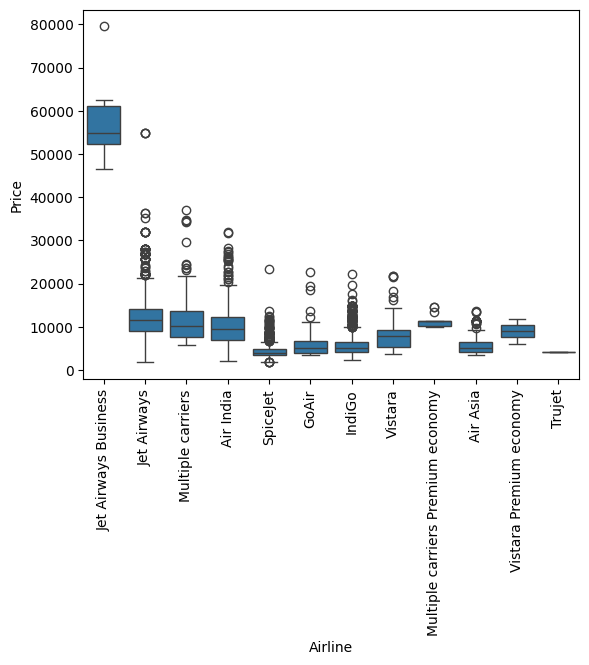

In [239]:
#2.Airline VS Price Analysis 
#boxplot
sns.boxplot(y = 'Price', x = 'Airline', data = data.sort_values('Price', ascending = False))
plt.xticks(rotation = "vertical")
plt.show()

In [240]:
#APPLYING ONE HOT ENCODING ON DATA (FEATURE ENCODNG TECHNIQUE) - Converting categorical text data into 0s and 1s, Creating one column per category
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445


If you have a nominal data i.e you dont have any order in data then it is always good to use a one hot encoder. (Popular rule of thumb) & if we have a ordinal data then it is good to use a label encoding.

In [241]:
cat_col = [col for col in data.columns if data[col].dtype =="object"]   #text/categorical data

In [242]:
num_col = [col for col in data.columns if data[col].dtype !="object"]   #numerical data

In [243]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [244]:
data['Source'].unique()     #to apply one-hot encoding on Source feature

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [245]:
data['Source'].apply(lambda x : 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [246]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x : 1 if x==sub_category else 0)     #lambda arguments : expression


In [247]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [248]:
#APPLYING TARGET GUIDED ENCODING ON DATA (FEATURE ENCODING)
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [249]:
data['Airline'].nunique()    #If we perform one-hot encoding then it can cause curse of dimensionality

12

If we have more subcategories, rather than increasing the dimensionality it is always good to use some optimized feature encoding technique.
Target guided encoding - Encoding a categorical column using the target variable
Each category is replaced by the mean of the target for that category

In [250]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [251]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index  #.index is used to access the row labels (indexes) of a Series or DataFrame.

In [252]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [253]:
dict_airlines = {key:index for index, key in enumerate(airlines, 0)}   #enumerate is used when you need both the index(count) and the vale while looping.

A dictionary that maps each airline to a unique number

In [254]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [255]:
data['Airline'] = data['Airline'].map(dict_airlines)     #.map() is used to replace values using a mapping rule - Encoding categorical variables

In [256]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [257]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [258]:
data['Destination']

0        New Delhi
1         Banglore
2           Cochin
3         Banglore
4        New Delhi
           ...    
10678     Banglore
10679     Banglore
10680        Delhi
10681    New Delhi
10682       Cochin
Name: Destination, Length: 10682, dtype: object

In [259]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [260]:
data['Destination'].replace('New Delhi', 'Delhi', inplace = True)

In [261]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [262]:
#FEATURE ENCODING FOR DESTINATION
dest = airlines = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [263]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [264]:
dict_dest = {key:index for index, key in enumerate(dest, 0)}

In [265]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [266]:
data['Destination'] = data['Destination'].map(dict_dest)

In [267]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [268]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [269]:
#PERFORM LABEL ENCODING MANUALLY - FEATURE ENCODING
#Converting categories into numbers, Each category gets a unique integer, No new columns are created
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [270]:
data['Total_Stops'].unique()     #observe this is an ordinal data - use a scikit learn package and call a label encoder function or use concept of dict

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [271]:
stop = {'non-stop': 0, '2 stops': 2, '1 stop':1, '3 stops':3, '4 stops':4}

In [272]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [273]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [274]:
#REMOVE THE UNNECESSARY FEATURES
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0


In [275]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [276]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [277]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [278]:
data['Additional_Info'].value_counts()/len(data)*100    #returns the percentage

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [279]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [280]:
data.drop(columns = ['Date_of_Journey' , 'Additional_Info', 'Duration_total_mins', 'Source', 'Journey_year'], axis = 1, inplace = True)    #to remove the featues in vertical way and update the dataframe

In [281]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [282]:
data.drop(columns = ['Route'], axis = 1, inplace = True)

In [283]:
data.head(1)

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0


In [284]:
data.drop(columns = ['Duration'], axis = 1, inplace = True)

In [285]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


In [286]:
#HANDLING OF OUTLIERS IN DATA - values which are extremely low or high, impact in the performance of ML models.
#Reason for outlier - typo while data entry
#To detect outlier - must be Numerical data, data visualisation(boxplot, histogram and distribution plot)
def plot(df, col):
    fig,(ax1 , ax2, ax3) = plt.subplots(3,1)
    sns.distplot(df[col], ax = ax1)   #histogram + KDE
    sns.boxplot(x = df[col], ax = ax2)   # x= means horizontal boxplot and y= vertical boxplot(default)
    sns.distplot(df[col], ax = ax3, kde = False)   #histogram

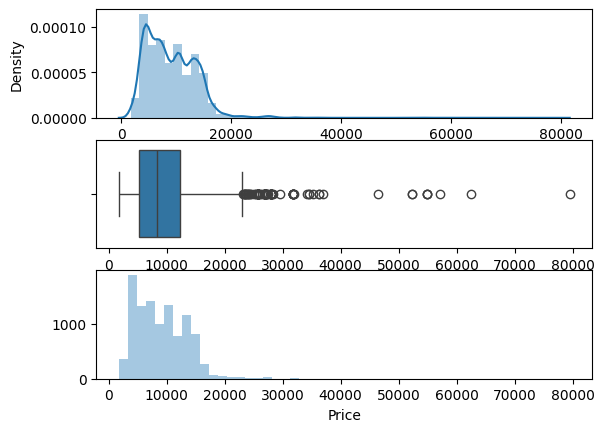

In [287]:
plot(data, 'Price')

1st plot is a distribution plot( Histrogram + KDE) which shows how values are spread. As here in tail is loner on the right stide if a right skewed (positive skew) few large outliers, mean>median.
2nd plot is a boxplot which shows median, quartiles, and outliers.
3rd plot is a Histogram where KDE( smooth curve) is turned off

In [288]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)
iqr = q3 - q1
maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [289]:
print(minimum)     #values lesser than this is considered outlier

-5367.0


In [290]:
print(maximum)     #values greater than this is considered outlier

23017.0


In [291]:
print ([price for price in data['Price'] if price > maximum or price < minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [292]:
len([price for price in data['Price'] if price > maximum or price < minimum])  #total number of outliers

94

In [293]:
data['Price'] = np.where(data['Price']>=35000, data['Price'].median(), data['Price'])

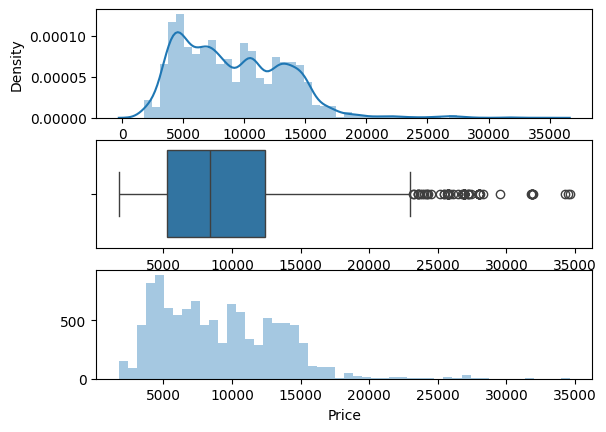

In [294]:
plot(data, 'Price')

In [295]:
#SELECT BEST FEATURES USING FEATURE SELECTION (which have good relations and contribute to the target variable)
#Mutual information approach (metric to find out whether 2 features/random variables are related wth each other or not, or it will return me a non-negative value which measure the dependency between two variables.
#If MI = 0 then, they are completely independent & if MI = 1 means higher dependency.

## = data.drop(['Price'], axis = 1)
#from sklearn.feature_selection import mutual_info_regression
#imp = mutual_info_regression(X , y)
#imp
#"""

In [296]:
X = data.drop(['Price'], axis = 1)

In [297]:
y = data['Price'] #target feature or variable

In [298]:
from sklearn.feature_selection import mutual_info_regression

In [299]:
imp = mutual_info_regression(X , y)

In [300]:
imp

array([1.32132148, 1.05622932, 0.78564869, 0.37406479, 0.62998948,
       0.92702214, 0.76937136, 1.14053633, 0.90298613, 1.12094861,
       0.67561287, 0.38481368, 0.44682676, 0.52378737, 0.14186465,
       0.21640253])

In [301]:
imp_df = pd.DataFrame(imp, index = X.columns)

In [302]:
imp_df.columns = ['Importance']

In [303]:
imp_df

,Importance
Airline,1.321321
Destination,1.056229
Total_Stops,0.785649
Journey_day,0.374065
Journey_month,0.629989
Dep_Time_hour,0.927022
Dep_Time_minute,0.769371
Arrival_Time_hour,1.140536
Arrival_Time_minute,0.902986
Duration_hours,1.120949


In [304]:
imp_df.sort_values(by = 'Importance')

,Importance
Source_Chennai,0.141865
Source_Mumbai,0.216403
Journey_day,0.374065
Source_Banglore,0.384814
Source_Kolkata,0.446827
Source_Delhi,0.523787
Journey_month,0.629989
Duration_mins,0.675613
Dep_Time_minute,0.769371
Total_Stops,0.785649


In [305]:
#MODEL BUILDING - BUILD AND SAVE MODEL
from sklearn.model_selection import train_test_split

In [306]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)
#X - independent dataframe, y- dependent dataframe, 25% of data as a testing data, random_state is for ensuring reproducible results i.e. same random numbers are generated every time.

In [307]:
from sklearn.ensemble import RandomForestRegressor

In [308]:
ml_model = RandomForestRegressor()

In [309]:
ml_model.fit(X_train , y_train)   #learns some relationship or patterns from the training data

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [310]:
y_pred = ml_model.predict(X_test)  #model makes prediction

In [311]:
y_pred

array([16832.44,  5412.52,  8808.74, ...,  3489.99,  6256.87,  6844.15])

In [312]:
#EVAULATION OF MODEL
from sklearn import metrics

In [313]:
metrics.r2_score(y_test, y_pred)    #accuracy approx close to 80%

0.8141686891291657

In [314]:
#SAVING OF MODEL OR MODEL DUMPING (PICKLE PACKAGE)
#A model is saved so that you don’t have to train it again and can use it later.
#Save model = train once, use many times

In [315]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)

[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for pickle


In [316]:
import pickle     #Loads Python’s built-in serialization(model saving) tool

In [317]:
file = open(r'F:\DATA_SCIENTIST_PREP\PORTFOLIO_PROJECTS\PROJECT_1\Flight_Price_resources/rf_random.pkl' , 'wb')

In [318]:
pickle.dump(ml_model , file)      #Converts the trained ML model into bytes (model dumping)

In [319]:
model = open(r'F:\DATA_SCIENTIST_PREP\PORTFOLIO_PROJECTS\PROJECT_1\Flight_Price_resources/rf_random.pkl' , 'rb')

In [320]:
forest = pickle.load(model)       #Recreates the exact trained model

In [321]:
y_pred2 = forest.predict(X_test)

In [322]:
metrics.r2_score(y_test, y_pred2)
# This evaluation metric measures how well a regression model explains the data.
# If value is 1 then perfect prediction, if 0 then model is no better than mean and if negatve then model is worse than mean.

0.8141686891291657

In [323]:
#evaluation metric - MAPE (mean absolute percentage error)
#measures prediction error in % terms. lower mape means better model and mape = 0 means perfect prediction.
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [324]:
mape(y_test , y_pred)

13.096544457014044

In [325]:
from sklearn import metrics

In [326]:
#automate machine learning pipeline
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score : {}'.format(model.score(X_train , y_train)))   #placeholder
    y_prediction = model.predict(X_test)
    print('prediction are: {}'.format(y_prediction))
    print('\n')  #new line
    r2_score = metrics.r2_score(y_test , y_prediction)
    metrics.r2_score(y_test , y_prediction)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_prediction)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_prediction)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_prediction))))
    print('MAPE: {}'.format(mape(y_test , y_prediction)))
    sns.distplot(y_test - y_prediction) 

Training score : 0.951568517393576
prediction are: [16771.8   5314.28  8866.3  ...  3540.02  6282.27  6912.33]


r2 score : 0.8125358971496448
MAE : 1169.2557465403893
MSE : 3649476.105929737
RMSE : 1910.3602031893715
MAPE: 13.087242537954793


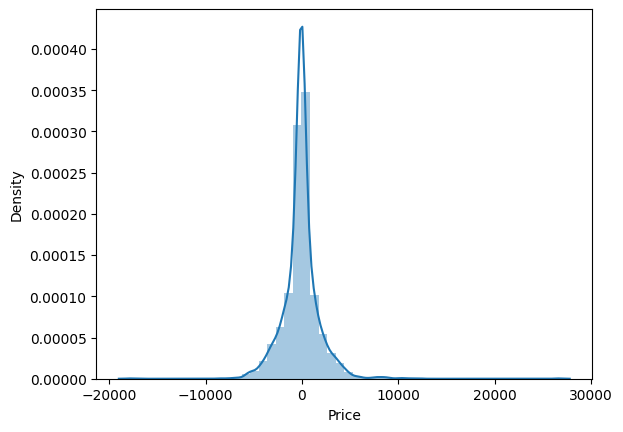

In [327]:
predict(RandomForestRegressor())

This is a distribution of the error. For most of the data pont you will encounter very less error or for most of the instances, ML algorithm is working phenomenally good.

In [328]:
#decision tree
from sklearn.tree import DecisionTreeRegressor

Training score : 0.966591628243878
prediction are: [16840.  4959.  8610. ...  3419.  5797.  6442.]


r2 score : 0.6799002040749743
MAE : 1403.5459004118306
MSE : 6231574.6800542865
RMSE : 2496.312216060781
MAPE: 15.535301971550636


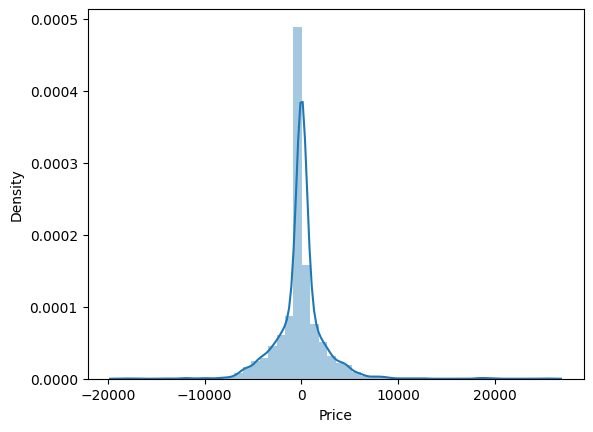

In [329]:
predict(DecisionTreeRegressor())

In [330]:
#HYPERTUNE ML MODEL (HYPERPARAMETER TUNING)
#It is adjusting the model's hyperparameters to get better performance in short it helps in finding the best model settings.
#dictionary of hyper parameter is often known as a hyper parameter space.
#cross-validation is a technique to evaluate a model reliably.
from sklearn.model_selection import RandomizedSearchCV

In [331]:
reg_rf = RandomForestRegressor()

In [332]:
np.linspace(start = 100, stop = 1200, num = 6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [333]:
n_estimators = [int (x) for x in np.linspace(start = 100, stop = 1200, num = 6)]
max_features = ["auto" , "sqrt"]
max_depth = [int (x) for x in np.linspace(start = 5, stop = 30, num = 4)]
min_samples_split = [5,10,15,100]

In [334]:
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split
}

In [335]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [336]:
rf_random = RandomizedSearchCV(estimator=reg_rf , param_distributions = random_grid , cv = 3, n_jobs= -1 , verbose = 2)

In [337]:
rf_random.fit(X_train , y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


,estimator,RandomForestRegressor()
,param_distributions,"{'max_depth': [5, 13, ...], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [5, 10, ...], 'n_estimators': [100, 320, ...]}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [338]:
rf_random.best_params_   #best parameters

{'n_estimators': 760,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 21}

In [339]:
rf_random.best_estimator_    #best machine learning object or this algorithm will give best score or best optimized model

,n_estimators,760
,criterion,'squared_error'
,max_depth,21
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [340]:
rf_random.best_score_   #accuracy which can be achieved by these parameters

0.8043386140864494